In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from agents import Prosumer
from enviroment import P2PEnergyMarket
from algorithms import MinimaxQ
from trainer import MinimaxTrainer

In [2]:
def plot_rewards(rewards, title, window_size=10):
    """
    Grafica la recompensa por episodio y su media móvil.
    
    :param rewards: Lista de recompensas obtenidas en cada episodio.
    :param window_size: Tamaño de la ventana para el promedio móvil.
    """
    episodes = np.arange(len(rewards))
    
    # Cálculo del promedio móvil
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    
    plt.figure(figsize=(10, 5))
    plt.plot(episodes, rewards, label='Recompensa por episodio', alpha=0.5)
    plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, label=f'Promedio móvil (window={window_size})', color='red', linewidth=2)
    
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
agent1_actions = np.array([-0.2, 0, 0.2])
agent2_actions =  np.array([-0.2, 0, 0.2])

a1_generation_power = -np.round(np.linspace(10, 20, 51),2)
a1_demand_power = np.round(np.linspace(30, 40, 51),2)

a2_generation_power = -np.round(np.linspace(80, 90, 51),2)
a2_demand_power = np.round(np.linspace(50, 60, 51),2)

agent_parameters = {
    'name': 'A',
    'actions': agent1_actions,
    'opponent_actions': agent2_actions,
    'generation': a1_generation_power,
    'consumption': a1_demand_power, 
    'epsilon': 0.2,
    'rol': 'generator'
}

agent_parameters2 = {
    'name': 'B',
    'actions': agent2_actions,
    'opponent_actions': agent1_actions,
    'generation': a1_generation_power,
    'consumption': a1_demand_power, 
    'epsilon': 0.2,
    'rol': 'consumer'
}

agent = Prosumer(agent_parameters)
opponent = Prosumer(agent_parameters2)

p2pmarket = P2PEnergyMarket(a = 0.089, b = 52, c = 0)
mmq = MinimaxQ(agent)

trainer = MinimaxTrainer(agent=agent, opponent=opponent, enviroment=p2pmarket, algorithm=mmq)

state = agent.get_state(5)
opponent_state = opponent.get_state(2)

In [12]:
hist_reward = trainer.train(2000)

Progreso: 100%|██████████| 2000/2000 [00:01<00:00, 1209.28step/s]


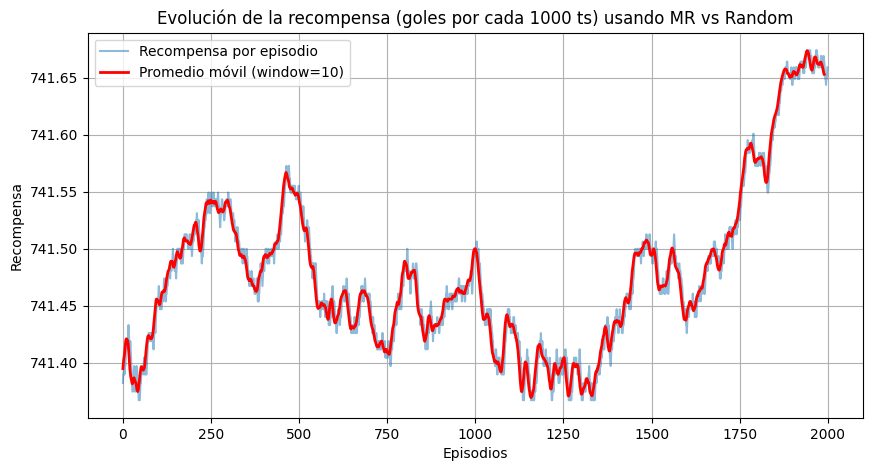

In [13]:
title = 'Evolución de la recompensa (goles por cada 1000 ts) usando MR vs Random'
plot_rewards(hist_reward,title, window_size=10)

In [13]:
# Agent action and next state
action = round(agent.choose_action(state),2)
next_state = agent.get_next_state(state, action)
print('state: ', state)
print('action: ', action)
print('next state: ', next_state)

# Opponent action and next opponent state
opponent_action = opponent.choose_action(opponent_state)
next_opponent_state = opponent.get_next_state(opponent_state, opponent_action)
print('oponent state: ', opponent_state)
print('opponent action: ', opponent_action)
print('next opponent state: ', next_opponent_state)

# Obtein the reward
reward = p2pmarket.get_reward(rol=agent.rol, generator_state=state, consumer_state=opponent_state)
print('reward: ', reward)

# Calculate the new policy
policy = mmq.update(state, action, opponent_action, reward, next_state)
print('policy: ', policy)


# Update states and policy
state = next_state
opponent_state = next_opponent_state
agent.pi_table = policy

state:  20.0
action:  0.2
next state:  20.0
oponent state:  20.0
opponent action:  0.0
next opponent state:  20.0
reward:  6.569174775061021
policy:  {20.0: {-0.2: 0.49523843803495143, 0.0: 0.5047615619650485, 0.2: 0.0}, 20.000000000000004: {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}, 19.999999999999996: {-0.2: 0.3333333333333333, 0.0: 0.3333333333333333, 0.2: 0.3333333333333333}}
